# Intensity Normalization

Intensity normalization, also known as intensity scaling or intensity standardization, is a common image processing technique used to adjust the intensity values of an image to a desired range or distribution. 

## ABOUT THE DATASET (IXI- DATASET)

In this project we have collected nearly 600 MR images from normal, healthy subjects. The MR image acquisition protocol for each subject includes T1 Images

The data has been collected at three different hospitals in London:

    Hammersmith Hospital using a Philips 3T system (details of scanner parameters)
    Guy’s Hospital using a Philips 1.5T system (details of scanner parameters)
    Institute of Psychiatry using a GE 1.5T system (details of the scan parameters not available at the moment)

The data has been collected as part of the project:
IXI – Information eXtraction from Images (EPSRC GR/S21533/02)

Reference Link - https://brain-development.org/ixi-dataset/


# METHODS:
- [Using custom Min-Max Scaling](#custom-min-max-scaling)
- [Using Mean](#using-mean)
- [Using Median](#using-median)
- [Using Min-Max Scaler and Standard Scaler from scikit-learn](#scikit-learn-standard-scaler)

# *Custom Min-Max Scaling*

In [ ]:
# # IXI DATASET
# file_HH = 'IXI-T1\IXI012-HH-1211-T1.nii.gz'
# file_GH = 'IXI-T1\IXI002-Guys-0828-T1.nii.gz' 

In [3]:
#ADNI DATASET
file_HH = r'New folder\1.5T.nii'
file_GH = r'New folder\3T.nii' 

In [4]:
import nibabel as nib
import scipy.ndimage as ndi

contents_HH = nib.load(file_HH)
contents_GH = nib.load(file_GH)

In [10]:
import numpy as np

# Get the image data as NumPy arrays
data_3T = contents_HH.get_fdata()
data_1_5T = contents_GH.get_fdata()

# Normalize the 3T image based on the intensity range of the 1.5T image
min_intensity_1_5T = np.min(data_1_5T)
max_intensity_1_5T = np.max(data_1_5T)
normalized_data_3T = (data_3T - np.min(data_3T)) / (np.max(data_3T) - np.min(data_3T))
# * (max_intensity_1_5T - min_intensity_1_5T) + min_intensity_1_5T


In [11]:

normalized_data_3T_New = (data_3T - np.min(data_3T)) / (np.max(data_3T) - np.min(data_3T)) * (max_intensity_1_5T - min_intensity_1_5T) + min_intensity_1_5T


In [12]:
max_intensity_1_5T

1182.5364990234375

In [13]:
min_intensity_1_5T

0.0

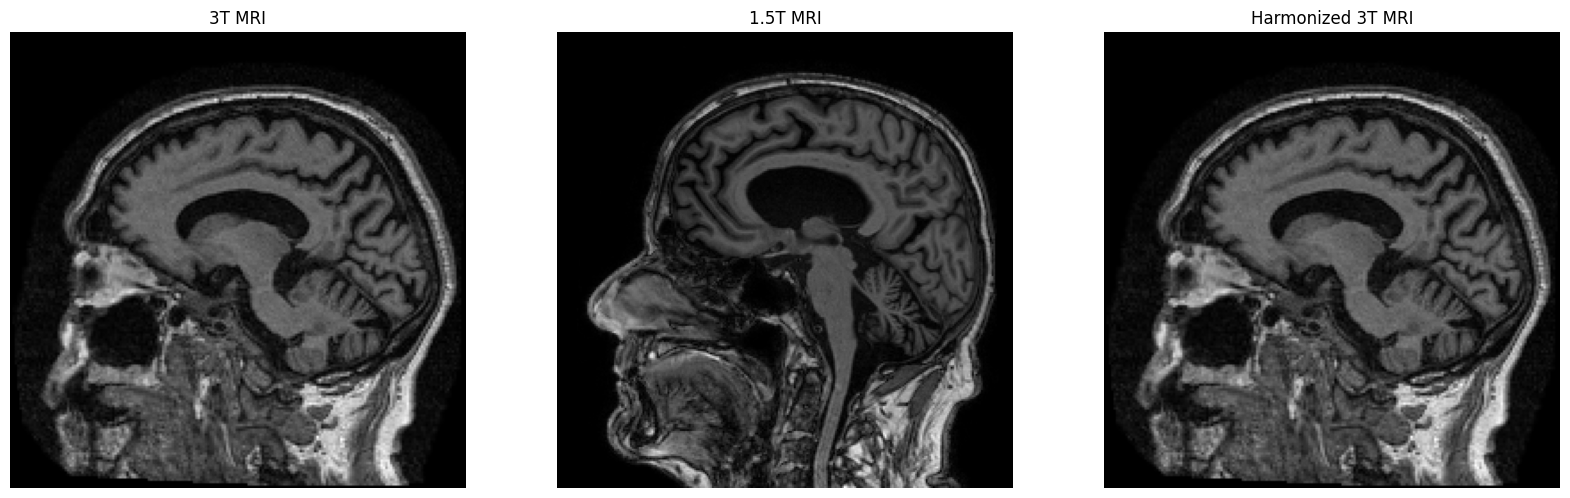

In [14]:
import matplotlib.pyplot as plt
slice_index = 90
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(data_3T[:, :,slice_index], cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_1_5T[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_data_3T[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()


(-0.5, 191.5, 191.5, -0.5)

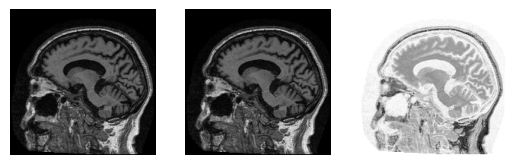

In [17]:
#CHECK DIFFERENCE
check = normalized_data_3T[:,:,100] - normalized_data_3T_New[:, :, slice_index]
plt.subplot(1,3,1)
plt.imshow(normalized_data_3T[:, :, slice_index],cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(normalized_data_3T_New[:, :, slice_index],cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(check,cmap='gray')
plt.axis('off')



In [19]:
np.unique(normalized_data_3T_New[:,:,100])

array([0.00000000e+00, 1.38694908e-32, 3.38303842e-22, ...,
       8.83574389e+02, 8.90866069e+02, 9.22939979e+02])

In [20]:
np.unique(normalized_data_3T[:,:,100])

array([0.00000000e+00, 1.17285943e-35, 2.86083214e-25, ...,
       7.47185723e-01, 7.53351858e-01, 7.80474835e-01])

# *Using Mean*

In [140]:
# Calculate the normalization factors
mean_intensity_3T = data_3T.mean()
mean_intensity_1p5T = data_1_5T.mean()
normalization_factor = mean_intensity_3T / mean_intensity_1p5T


In [141]:
mean_image = data_3T * normalization_factor

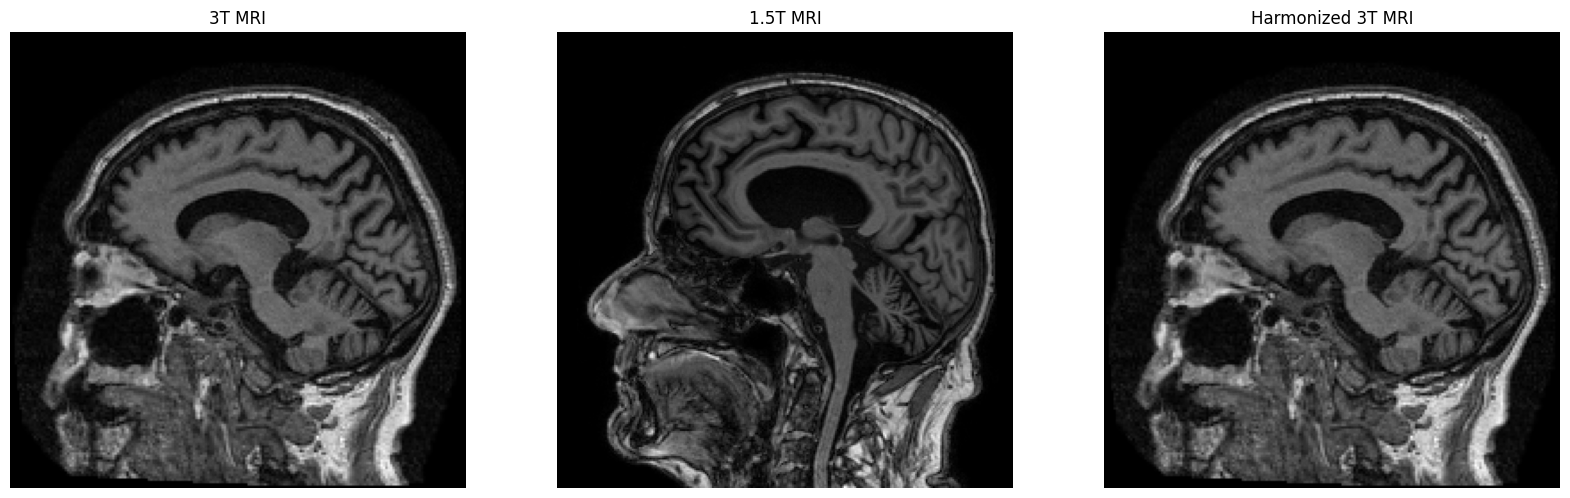

In [142]:
import matplotlib.pyplot as plt
slice_index = 90
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(data_3T[:, :,slice_index], cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_1_5T[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_image[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()


(-0.5, 191.5, 191.5, -0.5)

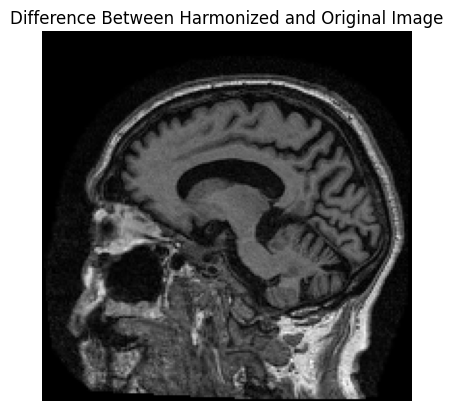

In [143]:
plt.imshow(ndi.rotate((mean_image[:,:,slice_index] - data_3T[:,:,slice_index]),0),cmap='gray')
plt.title('Difference Between Harmonized and Original Image')
plt.axis('off')

# *Using Median*

In [144]:
# Calculate the normalization factors
median_intensity_3T = np.median(data_3T)
median_intensity_1p5T = np.median(data_1_5T)
normalize_median = median_intensity_3T / median_intensity_1p5T


In [ ]:
normalized_image_median = data_3T * normalize_median

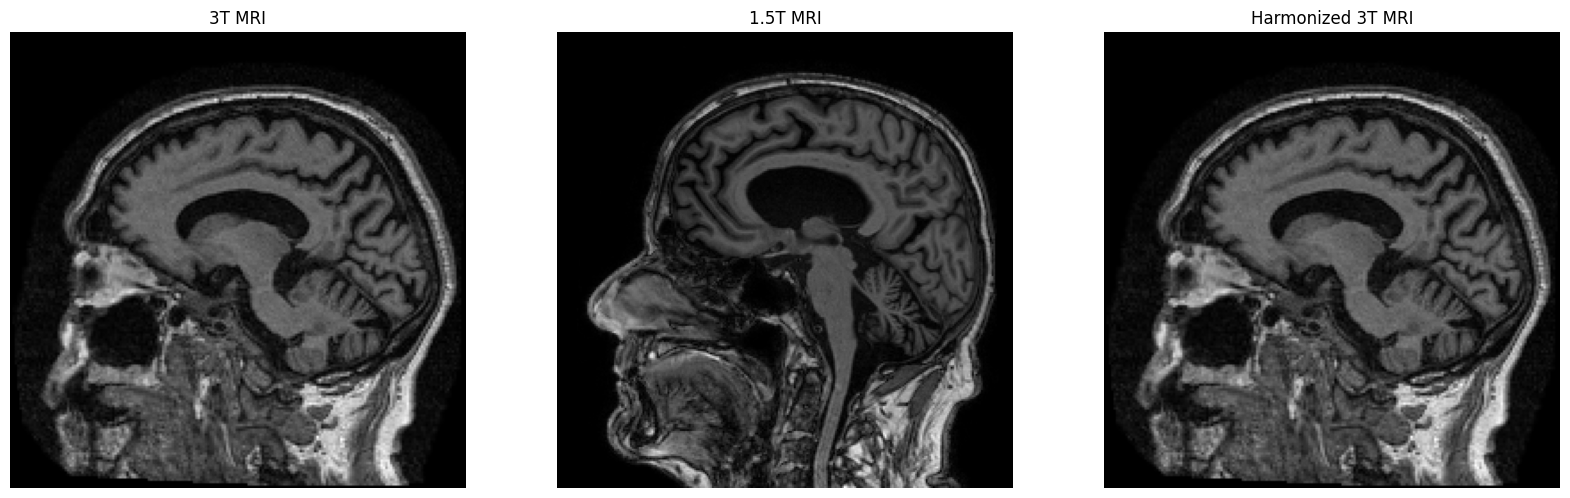

In [ ]:
import matplotlib.pyplot as plt
slice_index = 90
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(data_3T[:, :,slice_index], cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_1_5T[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_image_median[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()


(-0.5, 191.5, 191.5, -0.5)

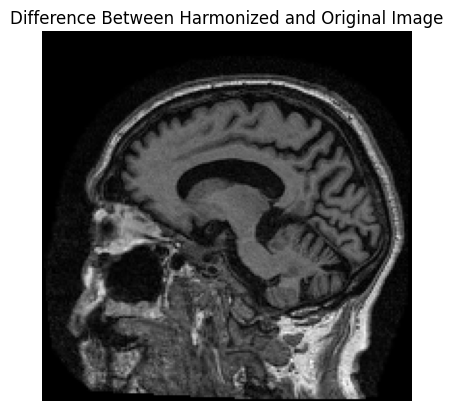

In [ ]:
check = normalized_image_median[:,:,slice_index] - data_3T[:,:,slice_index]
plt.imshow(ndi.rotate(check,0),cmap='gray')
plt.title('Difference Between Harmonized and Original Image')
plt.axis('off')

# *Scikit-Learn Standard Scaler*

In [ ]:
# import module
from sklearn.preprocessing import StandardScaler
 

 
# compute required values
scaler = StandardScaler()
model = scaler.fit(data_1_5T.reshape(-1,1))
scaled_data = model.transform(data_3T.reshape(-1,1))

In [ ]:
scaled_img = scaled_data.reshape(data_3T.shape)

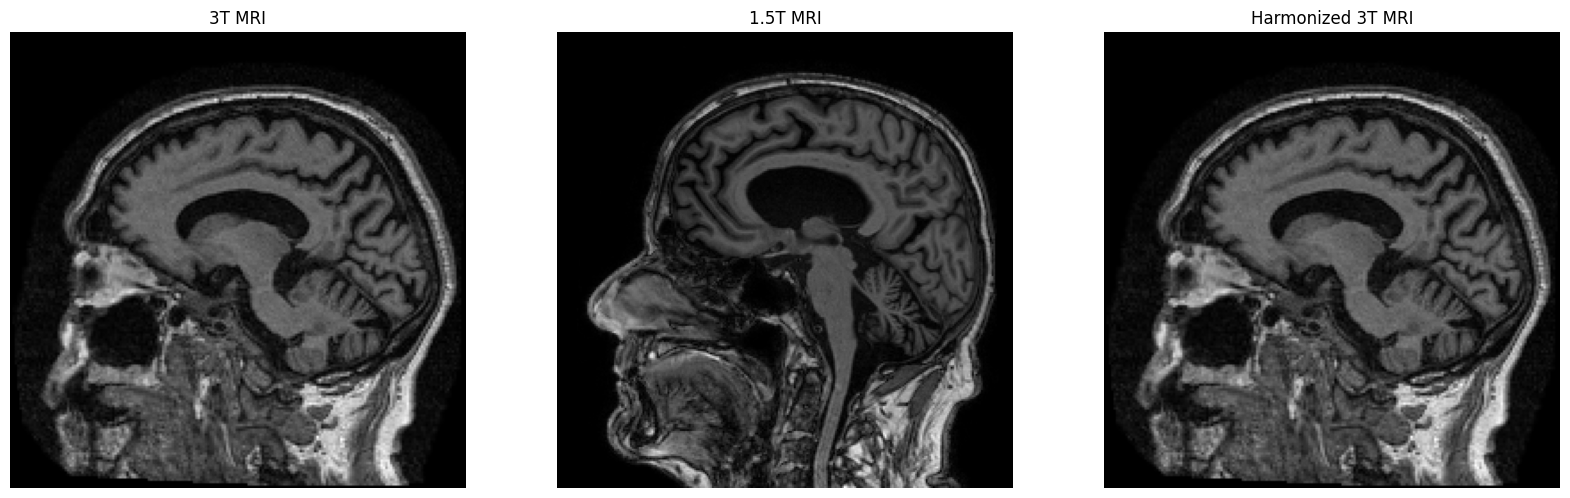

In [ ]:
import matplotlib.pyplot as plt
slice_index = 90
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(data_3T[:, :,slice_index], cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_1_5T[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(scaled_img[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()

(-0.5, 191.5, 191.5, -0.5)

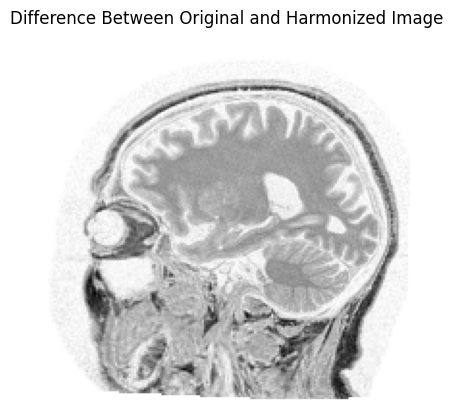

In [ ]:
plt.imshow(scaled_img[:,:,100]-data_3T[:,:,100],cmap='gray')
plt.title('Difference Between Original and Harmonized Image')
plt.axis('off')

# *Scikit-Learn Min Max Scaler*

In [ ]:
# import module
from sklearn.preprocessing import MinMaxScaler
 

 
# compute required values
scaler = MinMaxScaler()
model = scaler.fit(data_1_5T.reshape(-1,1))
scaled_data = model.transform(data_3T.reshape(-1,1))

In [ ]:
scaled_img_min_max = scaled_data.reshape(data_3T.shape)

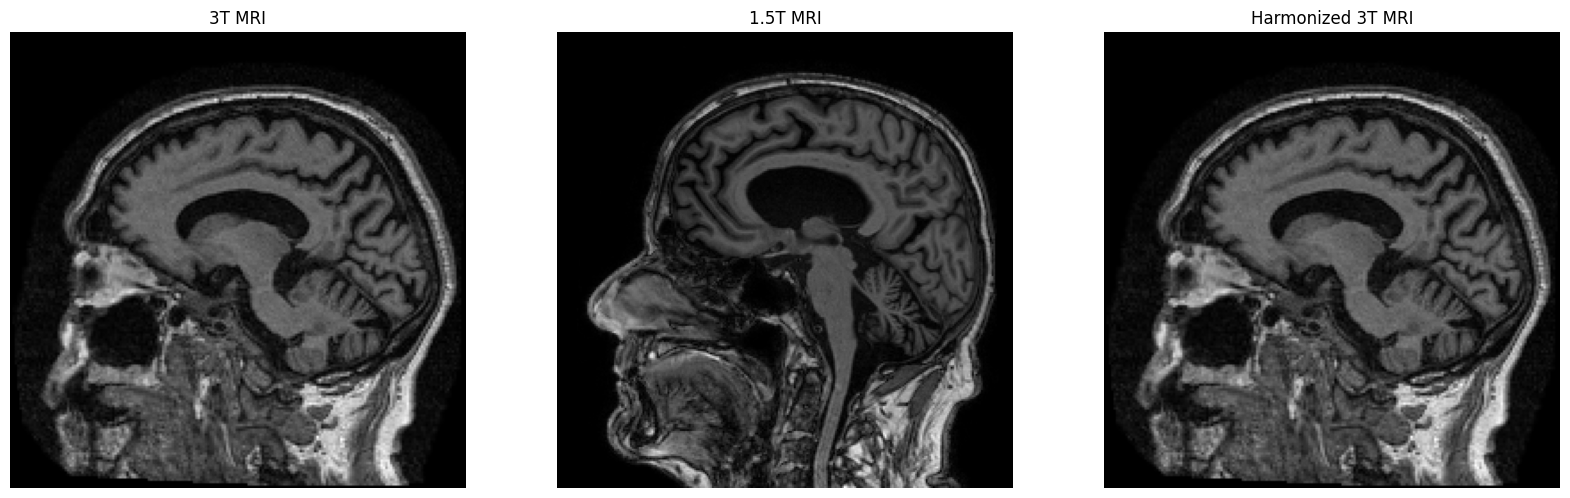

In [ ]:
import matplotlib.pyplot as plt
slice_index = 90
# Display the original 3T and 1.5T images side by side
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(data_3T[:, :,slice_index], cmap='gray', aspect='equal')
plt.title('3T MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(data_1_5T[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('1.5T MRI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(scaled_img_min_max[:, :, slice_index], cmap='gray', aspect='equal')
plt.title('Harmonized 3T MRI')
plt.axis('off')

plt.show()

(-0.5, 191.5, 191.5, -0.5)

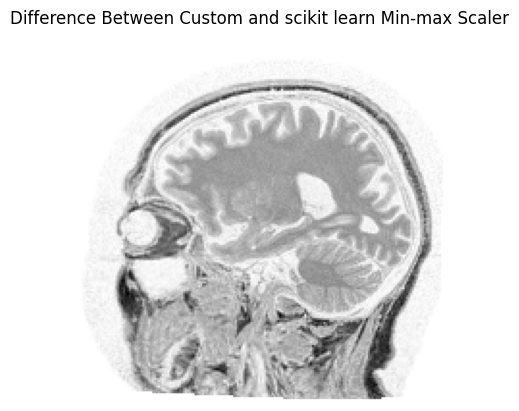

In [ ]:
plt.imshow(scaled_img_min_max[:,:,100]-normalized_data_3T[:,:,100],cmap='gray')
plt.title('Difference Between Custom and scikit learn Min-max Scaler')
plt.axis('off')